In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import json

config = json.load(open('../config/config.json'))
df = pd.read_csv('../simulation_results/para_profe/realization_0.8_2.csv')

fontsize = 14

df.head()

,Time,AgentID,AgentType,PosX,PosY,Radius
0,0.0,0,ZOMBIE,-3.120832,-2.656648,0.35
1,0.0,1,HUMAN,1.978793,3.420324,0.35
2,0.0,2,HUMAN,0.689053,-3.671276,0.35
3,0.0,3,HUMAN,13.133553,4.837294,0.35
4,0.0,4,HUMAN,-6.282414,3.420003,0.35


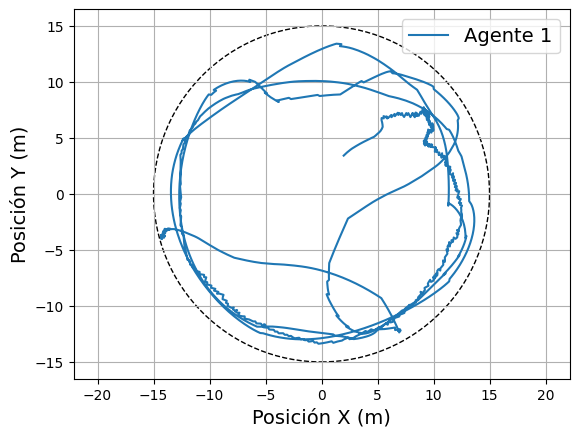

In [6]:
def plot_agent_path(df: pd.DataFrame, agent_id: int, config: dict):
    df_filtered = df[df['AgentID'] == agent_id]
    arena_radius = config['arenaRadius']
    
    # Create circle for arena boundary
    circle = plt.Circle((0, 0), arena_radius, fill=False, linestyle='--', color='black')
    fig, ax = plt.subplots()
    ax.add_patch(circle)
    
    # Plot agent path
    plt.plot(df_filtered['PosX'], df_filtered['PosY'], label=f'Agente {agent_id}')
    plt.xlabel('Posición X (m)', fontsize=fontsize)
    plt.xlim(-arena_radius, arena_radius)
    plt.ylabel('Posición Y (m)', fontsize=fontsize) 
    plt.ylim(-arena_radius, arena_radius)
    plt.legend(fontsize=fontsize)
    plt.axis('equal')
    plt.grid(True)
    plt.show()

plot_agent_path(df, 1, config)

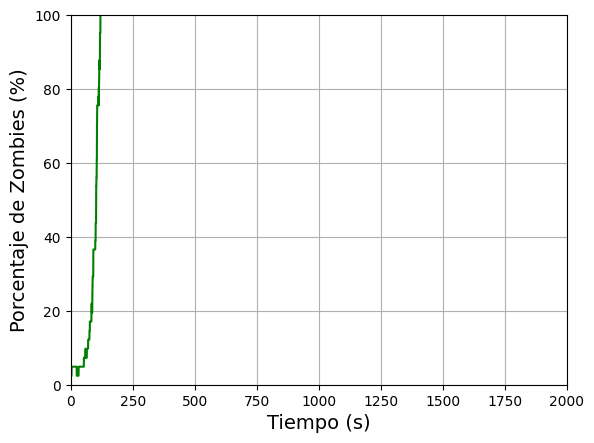

In [7]:
def plot_zombie_percentage(df: pd.DataFrame, config: dict):
    # Calcular porcentaje de zombies en el tiempo
    agent_counts = df.groupby(['Time', 'AgentType']).size().unstack(fill_value=0)
    total_agents = agent_counts['HUMAN'] + agent_counts['ZOMBIE']
    zombie_percentage = (agent_counts['ZOMBIE'] / total_agents) * 100
    max_time = config['simulationTime']
    # Crear gráfico
    plt.plot(agent_counts.index, zombie_percentage, color='green')
    plt.xlabel('Tiempo (s)', fontsize=fontsize)
    plt.ylabel('Porcentaje de Zombies (%)', fontsize=fontsize)
    plt.ylim(0, 100)
    plt.xlim(0, 2000)
    plt.grid(True)
    plt.show()

plot_zombie_percentage(df, config)

In [8]:
df = pd.read_csv('../simulation_results/finish_states_0.8.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../simulation_results/finish_states_0.8.csv'

In [146]:
df['averageVelocity'].describe()

count    24.000000
mean      0.325275
std       0.145843
min       0.064945
25%       0.215531
50%       0.290155
75%       0.467935
max       0.643097
Name: averageVelocity, dtype: float64